In [1]:
%run selectors.ipynb
print(len(alldat))

39


In [105]:
# run pca on visual region
# first, get data from that region
# then run pca

# here we use the 11th session
i = 11
sel = selectors[i]
vis_dat = alldat[i]['spks'][sel["NEURON_VISUAL"]]
#print(vis_dat.shape)

%run run_PCA.ipynb
%run smt_PCA.ipynb

W, V, variance_explained = run_pca(vis_dat[:,:,51:130])

# project data to pcs
pc_10ms = map_pca(W, V, vis_dat)

# get first two mean pcs and smooth them
n = 2500
pc_smt_ = np.zeros((pc_10ms.shape[0],n))

for i in range(pc_10ms.shape[0]):
    pc_smt = smt_pca(pc_10ms[i].mean(axis = 0),n)
    pc_smt_[i,:] = pc_smt

print(pc_10ms[0][1][51:].shape)

(199,)


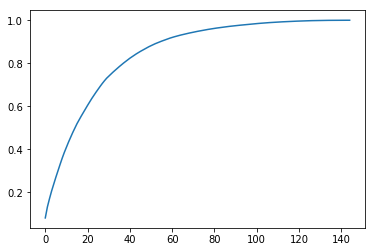

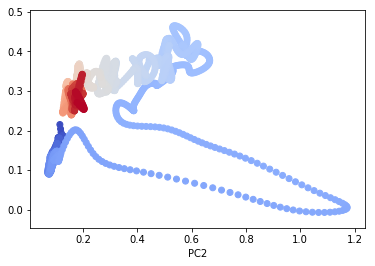

In [117]:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
plt.plot(variance_explained)
plt.show()


plt.scatter(pc_smt_[0], pc_smt_[1], c=np.arange(0,n), cmap=plt.cm.coolwarm)

plt.xlabel('PC1')
plt.xlabel('PC2')
plt.show()

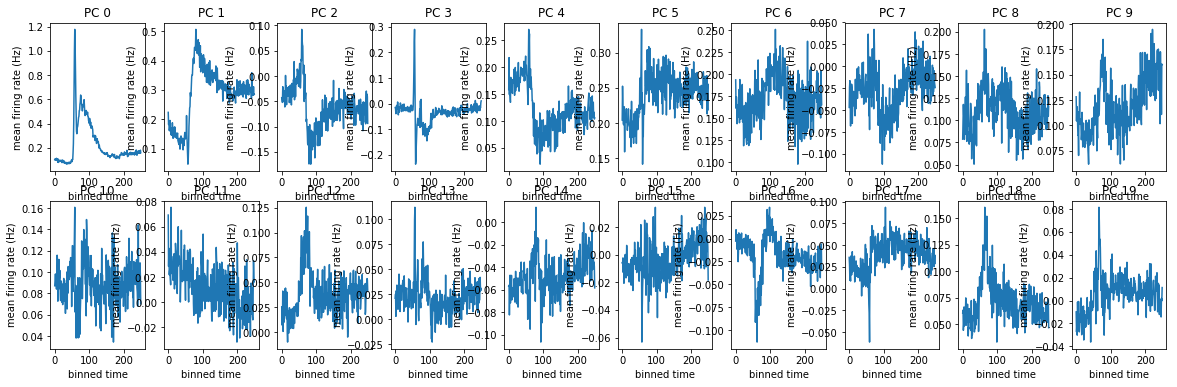

In [88]:
plt.figure(figsize= (20, 6))
for j in range(20):
  ax = plt.subplot(2,10,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1.mean(axis=0))  
  
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)